Predict Loan Repayment Probability using Machin Learning Algorithm.

In [75]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
import requests
api_url = "https://debt-api.onrender.com/loan/get_all"
res = requests.get(api_url)
df = pd.DataFrame(res.json()["data"])

In [77]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0,12000,12.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,12800,12.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,6600,12.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,12000,12.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,14100,12.0,1.0,Urban,Y


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             614 non-null    object 
 1   gender              601 non-null    object 
 2   married             611 non-null    object 
 3   dependents          599 non-null    object 
 4   education           614 non-null    object 
 5   self_employed       612 non-null    object 
 6   applicantIncome     614 non-null    int64  
 7   coapplicant_income  614 non-null    object 
 8   loan_amount         614 non-null    int64  
 9   loan_amount_term    614 non-null    float64
 10  credit_history      564 non-null    float64
 11  property_area       614 non-null    object 
 12  loan_status         614 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 62.5+ KB


In [79]:
df = df.drop("loan_id", axis=1)

In [80]:
df.isnull().sum()

gender                13
married                3
dependents            15
education              0
self_employed          2
applicantIncome        0
coapplicant_income     0
loan_amount            0
loan_amount_term       0
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [81]:
o = df["gender"].mode()
df["gender"].fillna(o[0], inplace=True)
m = df["married"].mode()
df["married"].fillna(m[0], inplace=True)
h = df["dependents"].mode()
df["dependents"].fillna(h[0], inplace=True)
s = df['self_employed'].mode()
df['self_employed'].fillna(s[0], inplace=True)
x = df["loan_amount"].mean()
df["loan_amount"].fillna(x, inplace=True)
lmt = df["loan_amount_term"].mean()
df["loan_amount_term"].fillna(lmt, inplace=True)
ch = df["credit_history"].mode()
df["credit_history"].fillna(ch[0], inplace=True)

In [82]:
df.isnull().sum()

gender                0
married               0
dependents            0
education             0
self_employed         0
applicantIncome       0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [83]:
df.duplicated().sum()

0

In [84]:
columns = ['gender','dependents','loan_amount','loan_amount_term']

In [85]:
df.dropna(subset=columns)

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0,12000,12.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,12800,12.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,6600,12.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,12000,12.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0,14100,12.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0,7100,12.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0,4000,6.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240,25300,12.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0,18700,12.0,1.0,Urban,Y


In [86]:
df.isnull().sum()

gender                0
married               0
dependents            0
education             0
self_employed         0
applicantIncome       0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [87]:
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

le_married = LabelEncoder()
df['married'] = le_married.fit_transform(df['married'])

le_education = LabelEncoder()
df['education'] = le_education.fit_transform(df['education'])

le_self_employed = LabelEncoder()
df['self_employed'] = le_self_employed.fit_transform(df['self_employed'])

le_property_area = LabelEncoder()
df['property_area'] = le_property_area.fit_transform(df['property_area'])

le_loan_status = LabelEncoder()
df['loan_status'] = le_loan_status.fit_transform(df['loan_status'])


In [88]:
df.head()

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0,12000,12.0,1.0,2,1
1,1,1,1,0,0,4583,1508,12800,12.0,1.0,0,0
2,1,1,0,0,1,3000,0,6600,12.0,1.0,2,1
3,1,1,0,1,0,2583,2358,12000,12.0,1.0,2,1
4,1,0,0,0,0,6000,0,14100,12.0,1.0,2,1


In [89]:
x = df.drop('loan_status',axis=1)
y = df['loan_status']

In [90]:
x

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,1,0,0,0,0,5849,0,12000,12.0,1.0,2
1,1,1,1,0,0,4583,1508,12800,12.0,1.0,0
2,1,1,0,0,1,3000,0,6600,12.0,1.0,2
3,1,1,0,1,0,2583,2358,12000,12.0,1.0,2
4,1,0,0,0,0,6000,0,14100,12.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0,7100,12.0,1.0,0
610,1,1,3,0,0,4106,0,4000,6.0,1.0,0
611,1,1,1,0,0,8072,240,25300,12.0,1.0,2
612,1,1,2,0,0,7583,0,18700,12.0,1.0,2


In [91]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: loan_status, Length: 614, dtype: int32

In [92]:
cols = ['gender','married','dependents','education','self_employed','applicantIncome','coapplicant_income','loan_amount','loan_amount_term']

In [93]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x[cols]=st.fit_transform(x[cols])

In [94]:
x

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,0.472343,-1.372089,-0.735646,-0.528362,-0.403582,0.072991,-0.554487,-0.282557,0.279683,1.0,2
1,0.472343,0.728816,0.259258,-0.528362,-0.403582,-0.134412,-0.038732,-0.188562,0.279683,1.0,0
2,0.472343,0.728816,-0.735646,-0.528362,2.477808,-0.393747,-0.554487,-0.917017,0.279683,1.0,2
3,0.472343,0.728816,-0.735646,1.892641,-0.403582,-0.462062,0.251980,-0.282557,0.279683,1.0,2
4,0.472343,-1.372089,-0.735646,-0.528362,-0.403582,0.097728,-0.554487,-0.035822,0.279683,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.735646,-0.528362,-0.403582,-0.410130,-0.554487,-0.858271,0.279683,1.0,0
610,0.472343,0.728816,2.249066,-0.528362,-0.403582,-0.212557,-0.554487,-1.222498,-2.499049,1.0,0
611,0.472343,0.728816,0.259258,-0.528362,-0.403582,0.437174,-0.472404,1.280097,0.279683,1.0,2
612,0.472343,0.728816,1.254162,-0.528362,-0.403582,0.357064,-0.554487,0.504645,0.279683,1.0,2


In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=8)

*****************
Logistic_Regression accuracy : 0.9193548387096774

classification_report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        47

    accuracy                           0.92        62
   macro avg       0.95      0.83      0.87        62
weighted avg       0.93      0.92      0.91        62

*****************
[False False False False False False False False False  True False]
(614, 12)
(614, 1)
Confusion Matrix is : 
 [[10  5]
 [ 0 47]]


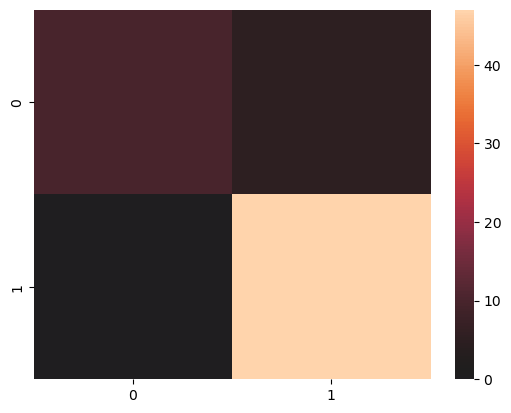

In [96]:
lr = LogisticRegression(solver='lbfgs', max_iter=300)
# fit the model with data
lr.fit(x_train, y_train)
# predict with test dataset
y_predict_LR = lr.predict(x_test)
# print(y_predict_LR)
accuracy_Score_LR = metrics.accuracy_score(y_test, y_predict_LR)
print("*****************")
print("Logistic_Regression accuracy :", accuracy_Score_LR)
# classification_report
print()
print("classification_report")
print(classification_report(y_test, y_predict_LR))
print("*****************")
# Feature selection
sel = SelectFromModel(lr)
sel.fit(x, y)
selected_features = sel.transform(x)
print(sel.get_support())
print(df.shape)
print(selected_features.shape)
#****************************************************
# Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict_LR)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center=True)
plt.show()

In [97]:
test_input = pd.DataFrame({
    'gender':'Male',
    'married':'Yes',
    'dependents':0,
    'education':'Graduate',
    'self_employed':'No',
    'applicantIncome':3036,
    'coapplicant_income':2504,
    'loan_amount':15800,
    'loan_amount_term':12,
    'credit_history':0,
    'property_area': 'Semiurban'
},index=[0])

test_input['gender']= le_gender.fit_transform(test_input['gender'])
test_input['married']= le_married.fit_transform(test_input['married'])
test_input['education']= le_education.fit_transform(test_input['education'])
test_input['self_employed']= le_self_employed.fit_transform(test_input['self_employed'])
test_input['property_area']= le_property_area.fit_transform(test_input['property_area'])

In [98]:
Prediction = lr.predict(test_input)

In [99]:
le_loan_status.inverse_transform(Prediction)

array(['N'], dtype=object)

In [101]:
import pickle

pickle.dump(lr, open('LogisticRegression.pkl' , 'wb'))

In [102]:
loaded_model = pickle.load(open('LogisticRegression.pkl' , 'rb'))

In [105]:
result = loaded_model.predict(test_input)
result


array([0])

In [106]:
le_loan_status.inverse_transform([result])

c:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['N'], dtype=object)